# Deep Learning Project - Image De-Noising
### ESD18I003 - Indra Sena Reddy
### EVD18I017 - Surya Mothukuri

## Importing required libraries and classes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import cv2
import os,random
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import MaxPooling2D,Conv2D,UpSampling2D
from tensorflow.keras import Sequential
from tensorflow.keras.utils import img_to_array


size = 1024

## Importing datasets of Retinal Images

In [ ]:
noise_images = []
noise = []
path1 = '/content/drive/MyDrive/Dataset/Deep Learning/Project/Bad/'
files=sorted(os.listdir(path1))

for i in tqdm(files):
  img = cv2.imread(path1+'/'+i,1) 
  img = cv2.resize(img,(size,size))
  img = img/255
  noise.append(i)
  noise_images.append(img_to_array(img))

noise_data = np.array(noise_images)

100%|██████████| 18/18 [00:04<00:00,  4.34it/s]


In [ ]:
clean_images = []
clean = []
path2 = '/content/drive/MyDrive/Dataset/Deep Learning/Project/Good/'
files=sorted(os.listdir(path2))

for i in tqdm(files):
  img = cv2.imread(path2+'/'+i,1) 
  img = cv2.resize(img,(size,size))
  img = img/255
  clean.append(i)
  clean_images.append(img_to_array(img))

clean_data = np.array(clean_images)

100%|██████████| 18/18 [00:04<00:00,  4.30it/s]


In [ ]:
noise

['10_bad.JPG',
 '11_bad.JPG',
 '12_bad.JPG',
 '13_bad.JPG',
 '14_bad.JPG',
 '15_bad.JPG',
 '16_bad.JPG',
 '17_bad.JPG',
 '18_bad.JPG',
 '1_bad.JPG',
 '2_bad.JPG',
 '3_bad.JPG',
 '4_bad.JPG',
 '5_bad.JPG',
 '6_bad.JPG',
 '7_bad.JPG',
 '8_bad.JPG',
 '9_bad.JPG']

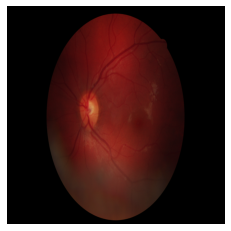

In [ ]:
plt.axis("off")
plt.imshow(cv2.cvtColor(noise_data[1], cv2.COLOR_BGR2RGB))
plt.show()

## Building the autoencoder model

In [ ]:
autoencoder_encoder = Sequential()
autoencoder_encoder.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(size,size,3)))
autoencoder_encoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_encoder.add(Conv2D(16,(3,3),activation='relu',padding='same'))
autoencoder_encoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_encoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
autoencoder_encoder.add(MaxPooling2D((2, 2), padding='same'))


autoencoder_decoder = Sequential()
autoencoder_decoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
autoencoder_decoder.add(UpSampling2D((2,2)))
autoencoder_decoder.add(Conv2D(16,(3,3),activation='relu',padding='same'))
autoencoder_decoder.add(UpSampling2D((2,2)))
autoencoder_decoder.add(Conv2D(32,(3,3),activation='relu',padding='same'))
autoencoder_decoder.add(UpSampling2D((2,2)))
autoencoder_decoder.add(Conv2D(3,(3,3),activation='relu',padding='same'))

autoencoder = Sequential([autoencoder_encoder,autoencoder_decoder])



In [ ]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
autoencoder_encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1024, 1024, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 512, 512, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 256, 256, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 8)       1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 8)      0

In [ ]:
autoencoder_decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 8)       584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 256, 256, 8)      0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 16)      1168      
                                                                 
 up_sampling2d_1 (UpSampling  (None, 512, 512, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 512, 512, 32)      4640      
                                                                 
 up_sampling2d_2 (UpSampling  (None, 1024, 1024, 32)  

In [ ]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 8)       6680      
                                                                 
 sequential_1 (Sequential)   (None, 1024, 1024, 3)     7259      
                                                                 
Total params: 13,939
Trainable params: 13,939
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(noise_data,clean_data,test_size=0.2,random_state=42)

## Training the autoencoder

In [ ]:
history = autoencoder.fit(x_train,x_train,epochs=100,batch_size=4)

Epoch 1/100
4/4 [==============================] - 48s 11s/step - loss: 0.7356 - accuracy: 0.4270
Epoch 2/100
4/4 [==============================] - 43s 10s/step - loss: 0.3429 - accuracy: 0.0855
Epoch 3/100
4/4 [==============================] - 42s 10s/step - loss: 0.2684 - accuracy: 0.4766
Epoch 4/100
4/4 [==============================] - 43s 10s/step - loss: 0.2503 - accuracy: 0.4766
Epoch 5/100
4/4 [==============================] - 47s 12s/step - loss: 0.2374 - accuracy: 0.8081
Epoch 6/100
4/4 [==============================] - 43s 10s/step - loss: 0.2471 - accuracy: 0.4229
Epoch 7/100
4/4 [==============================] - 43s 10s/step - loss: 0.2358 - accuracy: 0.8653
Epoch 8/100
4/4 [==============================] - 42s 10s/step - loss: 0.2253 - accuracy: 0.8641
Epoch 9/100
4/4 [==============================] - 42s 10s/step - loss: 0.2231 - accuracy: 0.8636
Epoch 10/100
4/4 [==============================] - 42s 10s/step - loss: 0.2228 - accuracy: 0.8660
Epoch 11/100
4/4 [=

In [ ]:
 x_pred = autoencoder.predict(x_test)

In [ ]:
type(x_pred)

numpy.ndarray

## Visualising the results

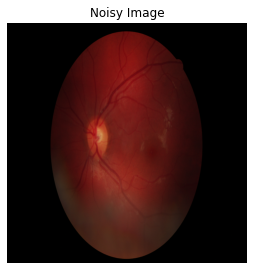

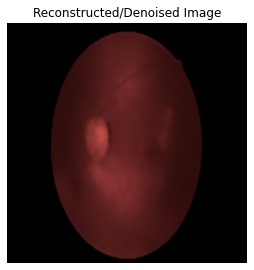

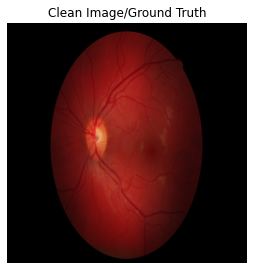

In [ ]:
i=1

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(3,1,1)
plt.axis("off")
plt.imshow(cv2.cvtColor(x_test[i], cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.show()

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(3,1,2)
plt.axis("off")
plt.imshow(np.array(cv2.cvtColor(x_pred[i], cv2.COLOR_BGR2RGB)))
plt.title('Reconstructed/Denoised Image')
plt.show()

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(3,1,3)
plt.axis("off")
plt.imshow(cv2.cvtColor(y_test[i], cv2.COLOR_BGR2RGB))
plt.title('Clean Image/Ground Truth')
plt.show()

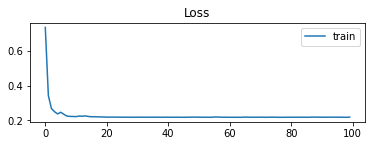

--


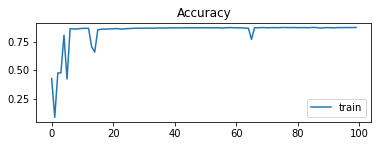

In [ ]:

plt.subplot(2,1,1)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()
print('--')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()